In [2]:
from sklearn import model_selection, datasets, linear_model, metrics
from matplotlib.colors import ListedColormap

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
reg_x, reg_y, coef = datasets.make_regression(n_features=1,
                             n_informative=1, 
                             n_targets=1,
                             tail_strength=0.0,
                             noise=5,
                             random_state=568465,
                             bias=10.5, 
                             coef=True)

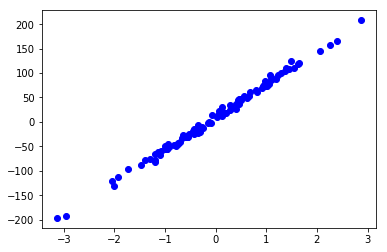

In [58]:
pylab.scatter(reg_x[:, 0], reg_y, color='b')

In [35]:
from sklearn.linear_model import LinearRegression

In [59]:
clf = LinearRegression(fit_intercept=True)

In [68]:
clf.fit(reg_x, reg_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
clf.coef_

array([ 67.47165625])

In [62]:
clf.intercept_

10.293820563319795

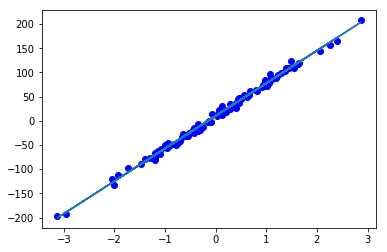

In [63]:
pylab.scatter(reg_x, reg_y, color='b')
pylab.plot(reg_x, clf.predict(reg_x))

In [70]:
reg_y_ = clf.predict(reg_x)

In [71]:
print(reg_y[:10])
print(reg_y_[:10])

[ -44.16877849   -2.42543525  -77.10295376   12.76555952  -54.56051203
  -78.5279       72.91782657   52.70259068  -15.44653615  156.52617683]
[ -4.02333902e+01  -5.36058904e-02  -7.09041695e+01   1.81982629e+01
  -5.50814600e+01  -8.37395106e+01   7.86365631e+01   5.42979663e+01
  -1.86826112e+01   1.62040589e+02]


In [72]:
metrics.mean_absolute_error(reg_y, reg_y_)

4.1914195514713457

In [74]:
metrics.mean_squared_error(reg_y, reg_y_)

26.710726726205777

In [76]:
metrics.r2_score(reg_y, reg_y_)

0.99516648168929944

In [77]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(reg_x, reg_y, test_size = 0.3)

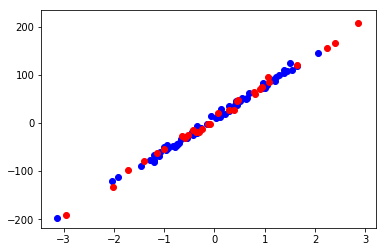

In [84]:
pylab.scatter(train_x, train_y, color='b')
pylab.scatter(test_x, test_y, color='r')

In [80]:
clf = LinearRegression(fit_intercept=True)

In [81]:
clf.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
test_y_ = clf.predict(test_x)

In [85]:
metrics.mean_squared_error(test_y, test_y_)

31.899807512567843

In [86]:
metrics.r2_score(test_y, test_y_)

0.99570102289373208

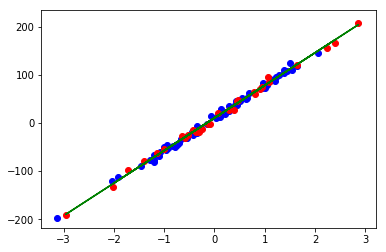

In [90]:
pylab.scatter(train_x, train_y, color='b')
pylab.scatter(test_x, test_y, color='r')
pylab.plot(test_x, test_y_, color='g')

In [95]:
cv = model_selection.KFold(n_splits=5)
for tr_i, ts_i in cv.split(reg_x[:10, :]):
    print("Train:", tr_i, "test:", ts_i)

Train: [2 3 4 5 6 7 8 9] test: [0 1]
Train: [0 1 4 5 6 7 8 9] test: [2 3]
Train: [0 1 2 3 6 7 8 9] test: [4 5]
Train: [0 1 2 3 4 5 8 9] test: [6 7]
Train: [0 1 2 3 4 5 6 7] test: [8 9]


In [98]:
cv_time = model_selection.TimeSeriesSplit(n_splits=5)
for tr_i, ts_i in cv_time.split(reg_x[:20, :]):
    print("Train:", tr_i, "test:", ts_i)

Train: [0 1 2 3 4] test: [5 6 7]
Train: [0 1 2 3 4 5 6 7] test: [ 8  9 10]
Train: [ 0  1  2  3  4  5  6  7  8  9 10] test: [11 12 13]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] test: [14 15 16]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] test: [17 18 19]
